# 텐서(Tensors)

> 2.2.1 장에 해당하는 코드

해당 챕터에서는 파이썬의 기본 문법과 numpy 패키지의 사용법은 알고 있다고 가정하고 진행합니다. 파이썬의 문법을 배우시고 싶은 분은 아래 링크를 참고

* [모두를 위한 파이썬](https://www.edwith.org/pythonforeverybody)

In [1]:
# 패키지를 불러온다.
import matplotlib.pyplot as plt
import numpy as np
import torch
print(" torch: {} \n numpy: {}".format(torch.__version__, np.__version__))
print(" Use GPU? {}".format(torch.cuda.is_available()))

 torch: 1.0.1.post2 
 numpy: 1.16.2
 Use GPU? True


## 텐서를 만드는 방법

In [2]:
# list 로부터 2x3 텐서 생성
x_list = [[1, 2, 3], [4, 5, 6]]
x = torch.Tensor(x_list)
print(x)

# numpy array 로부터 2x3 텐서 생성
x_numpy = np.array([[1, 2, 3], [4, 5, 6]])
x = torch.Tensor(x_numpy)
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


다시 원래 자료형태로 복귀

In [3]:
# .tolist()
x_back2list = x.tolist()
print(type(x_back2list))

# .numpy()
x_back2numpy = x.numpy()
print(type(x_back2numpy))

<class 'list'>
<class 'numpy.ndarray'>


gpu 사용하기

In [4]:
# 기본 device 정보
print(x.device)

device = 'cuda'
# GPU 사용
x = x.to(device)
print(x.device)

device = 'cpu'
# CPU 사용
x = x.to(device)
print(x.device)

cpu
cuda:0
cpu


랜덤 텐서 생성

In [5]:
# 랜덤 숫자로 구성된 크기가 2x3 인 텐서 생성
# 0과 1사이의 랜덤한 숫자
print(torch.rand(2, 3))

# 0과 8 사이의 정수형 랜덤한 숫자
print(torch.randint(low=0, high=8, size=(2, 3)))

tensor([[0.2318, 0.6375, 0.7980],
        [0.4150, 0.2141, 0.5844]])
tensor([[4, 7, 0],
        [3, 1, 6]])


`torch.zeros_like`, `torch.ones_like` 

In [6]:
# GPU를 사용하고 크기가 x 와 같은 0으로 채워진 텐서 생성
x_zeros = torch.zeros_like(x.cuda())
print(x_zeros.device)
print(x_zeros)

cuda:0
tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


## 텐서의 타입(type)

In [7]:
# 실수형 텐서
a = torch.FloatTensor(np.array([[1, 2, 3], [4, 5, 6]]))
print(a.type())
print(a)

# 정수형 텐서
b = torch.LongTensor(np.array([[1, 2, 3], [4, 5, 6]]))
print(b.type())
print(b)

# 8 bit 정수형
c = torch.ByteTensor([True, False, True, True])
print(c.type())
print(c)

torch.FloatTensor
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.LongTensor
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.ByteTensor
tensor([1, 0, 1, 1], dtype=torch.uint8)


## Tensor Manipulation

### Slicing

In [8]:
torch.manual_seed(777)
x = torch.randint(0, 10, size=(2, 3, 4))
print(x)

tensor([[[5, 9, 1, 8],
         [5, 7, 7, 7],
         [3, 4, 1, 7]],

        [[2, 0, 6, 3],
         [2, 3, 0, 0],
         [9, 5, 4, 2]]])


In [9]:
print(x[0, 2, 3])

tensor(7)


In [10]:
def draw_tensor(temp):
    """tensor drawing in ch3"""
    fig, axes = plt.subplots(len(temp), 1)
    for i in range(len(temp)):
        axes[i].matshow(temp.numpy()[i], vmin=0, vmax=1, cmap='gray')
    plt.show()

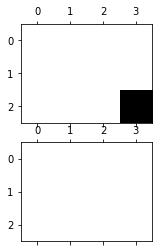

In [11]:
# 선택한 텐서를 시각화 한다.
temp = torch.ones_like(x)
temp[0, 2, 3] = 0
draw_tensor(temp)

In [12]:
print(x[0, :2, 3])

tensor([8, 7])


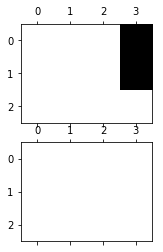

In [13]:
# 선택한 텐서를 시각화 한다.
temp = torch.ones_like(x)
temp[0, :2, 3] = 0
draw_tensor(temp)

In [14]:
x[0, 2, 1:]

tensor([4, 1, 7])

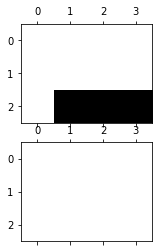

In [15]:
temp = torch.ones_like(x)
temp[0, 2, 1:] = 0
fig = draw_tensor(temp)

In [16]:
print(x[0, 2, 1:2])

tensor([4])


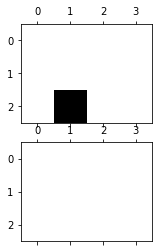

In [17]:
temp = torch.ones_like(x)
temp[0, 2, 1:2] = 0
fig = draw_tensor(temp)

In [18]:
print(x[0, 2, :])

tensor([3, 4, 1, 7])


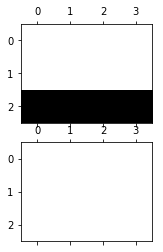

In [19]:
temp = torch.ones_like(x)
temp[0, 2, :] = 0
fig = draw_tensor(temp)

### view

In [20]:
# 크기가 (2, 3, 4) 3차원 텐서를 (2, 2, 6) 으로 변경
print(x.view(2, 2, 6))

# 크기가 (2, 3, 4) 3차원 텐서를 (1, 1, 12) 으로 변경
print(x.view(-1, 1, 12))

tensor([[[5, 9, 1, 8, 5, 7],
         [7, 7, 3, 4, 1, 7]],

        [[2, 0, 6, 3, 2, 3],
         [0, 0, 9, 5, 4, 2]]])
tensor([[[5, 9, 1, 8, 5, 7, 7, 7, 3, 4, 1, 7]],

        [[2, 0, 6, 3, 2, 3, 0, 0, 9, 5, 4, 2]]])


### transpose

In [21]:
# (2, 3, 4) 크기의 텐서의 첫번째 차원과 두번째 차원이 바뀐다.
x_transposed = x.transpose(0, 1)
print(x_transposed.size())
print(x_transposed)

torch.Size([3, 2, 4])
tensor([[[5, 9, 1, 8],
         [2, 0, 6, 3]],

        [[5, 7, 7, 7],
         [2, 3, 0, 0]],

        [[3, 4, 1, 7],
         [9, 5, 4, 2]]])


In [22]:
# (2, 3) 크기의 행렬 생성
A = torch.Tensor([[1, 2, 3], 
                  [4, 5, 6]])  
# 크기가 (3, 2) 이 되었다.
A.t()  

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

## squeeze & unsqueeze

In [23]:
# 크기가 (2, 1, 3, 4, 1) 인 5차원 텐서를 생성한다
x = torch.rand((2, 1, 3, 4, 1))  

# 모든 차원에서 크기가 1인 차원을 squeeze 한다.
print(x.squeeze().size())  # 크기확인

# 두번째 차원(크기 = 1)을 squeeze 한다.
print(x.squeeze(1).size())  # 크기확인

# 4번째 차원에 크기를 1 추가, 6차원 텐서가 된다.
print(x.unsqueeze(3).size())  # 크기확인

torch.Size([2, 3, 4])
torch.Size([2, 3, 4, 1])
torch.Size([2, 1, 3, 1, 4, 1])


### cat & stack

In [24]:
def draw_tensor2(x):
    """tensor drawing in ch3: cat&stack"""
    subplot_size = 1 if x.ndimension() <= 2 else x.size(0)
    fig, axes = plt.subplots(subplot_size, 1)
    if subplot_size == 1: 
        axes.matshow(x.numpy(), vmin=0, vmax=1, cmap='gray')
    else:
        for i in range(subplot_size):
            axes[i].matshow(x.numpy()[i], vmin=0, vmax=1, cmap='gray')
    plt.show()

tensor([[0.0819, 0.4911, 0.4033],
        [0.3859, 0.8813, 0.8811],
        [0.7242, 0.5033, 0.8249],
        [0.2634, 0.3112, 0.5948]])


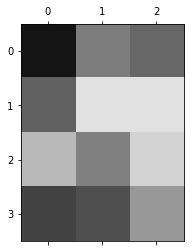

In [25]:
torch.manual_seed(777)
# 크기가 (2, 3) 인 A, B 텐서를 만든다
A = torch.rand((2, 3))
B = torch.rand((2, 3))
# 첫번째 차원을 기준으로 텐서를 concatenate 한다.
AB_cated = torch.cat([A, B], dim=0)
print(AB_cated)

# 시각화
draw_tensor2(AB_cated)

tensor([[[0.0819, 0.4911, 0.4033],
         [0.3859, 0.8813, 0.8811]],

        [[0.7242, 0.5033, 0.8249],
         [0.2634, 0.3112, 0.5948]]])
tensor([[[0.0819, 0.4911, 0.4033],
         [0.3859, 0.8813, 0.8811]],

        [[0.7242, 0.5033, 0.8249],
         [0.2634, 0.3112, 0.5948]]])


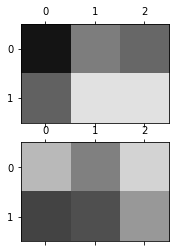

In [26]:
# 첫번째 차원을 기준으로 텐서를 stack 한다.
AB_stacked = torch.stack([A, B], dim=0)
print(AB_stacked)

# 각 텐서를 첫번째 차원 기준으로 unsqueeze 후, cat 한것과 같은 결과
AB_unsqueeze_cat = torch.cat([A.unsqueeze(0), B.unsqueeze(0)], dim=0)
print(AB_unsqueeze_cat)

# 시각화
draw_tensor2(AB_stacked)

## 텐서의 사칙연산: add / multiplication

### 텐서의 덧셈과 뺄셈

In [27]:
# x, y 크기가 3인 1차원 벡터 생성
x = torch.Tensor([1, 2, 3])
y = torch.Tensor([4, 5, 6])

# 같은 크기의 벡터간 덧셈
print(torch.add(x, y))

# 같은 크기의 벡터간 뺄셈
print(torch.sub(x, y))

# 벡터 + 스칼라
print(x+1)

# 벡터 - 스칼라
print(x-1)

tensor([5., 7., 9.])
tensor([-3., -3., -3.])
tensor([2., 3., 4.])
tensor([0., 1., 2.])


### 텐서의 곱셈

In [28]:
# 곱셈
print(x * y)
print(torch.mul(x, y))

# 나눗셈
print(x / y)
print(torch.div(x, y))

tensor([ 4., 10., 18.])
tensor([ 4., 10., 18.])
tensor([0.2500, 0.4000, 0.5000])
tensor([0.2500, 0.4000, 0.5000])


In [29]:
print("inner product: ")
print(torch.dot(x, y))
print(x.dot(y))

inner product: 
tensor(32.)
tensor(32.)


In [30]:
# (3, 2) 크기의 X 텐서와 (2, 2) 크기의 Y 텐서를 생성한다.
X = torch.Tensor([[1, 4], [2, 5], [3, 6]])
Y = torch.Tensor([[7, 9], [8, 10]])

# 행렬의 곱셈을 한다.
print(torch.mm(X, Y))
print(X.mm(Y))

tensor([[39., 49.],
        [54., 68.],
        [69., 87.]])
tensor([[39., 49.],
        [54., 68.],
        [69., 87.]])


## 기초연산: 

### sum / mean

In [31]:
# (2, 2, 2) 크기의 3차원 텐서 Z 를 생성한다.
Z = torch.Tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# 텐서의 모든 원소의 합 혹은 평균을 구한다.
print(torch.sum(Z))
print(torch.mean(Z))

# 지정한 차원의 합을 축소시키면서 합 혹은 평균을 구한다.
print(torch.sum(Z, dim=0))
print(torch.mean(Z, dim=0))

tensor(36.)
tensor(4.5000)
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[3., 4.],
        [5., 6.]])


### max & argmax / min & argmin 

In [32]:
# 텐서의 모든 원소중 최대값 및 최대값의 위치 구하기
print(torch.max(Z))
print(torch.argmax(Z))

# 텐서의 모든 원소중 최소값 및 최소값의 위치 구하기
print(torch.min(Z))
print(torch.argmin(Z))

# 차원 지정시 지정된 차원을 기준으로 차원이 축소 되면서 
# 최대값 및 위치 혹은 최소값 및 위치를 가진 튜플(tuple)을 반환한다.
print(torch.max(Z, dim=0))
print(torch.min(Z, dim=0))

tensor(8.)
tensor(7)
tensor(1.)
tensor(0)
(tensor([[5., 6.],
        [7., 8.]]), tensor([[1, 1],
        [1, 1]]))
(tensor([[1., 2.],
        [3., 4.]]), tensor([[0, 0],
        [0, 0]]))


### 논리연산

In [33]:
# 크기가 3인 벡터를 생성
z = torch.Tensor([-3, 2, 0])

# 0과 같다
print(z.eq(0))
print(z == 0)

# 0 보다 크거나 같다
print(z.ge(0))
print(z >= 0)

# 0보다 크다
print(z.gt(0))
print(z > 0)

# 0보다 작거나 같다
print(z.le(0))
print(z <= 0)

# 0보다 작다
print(z.lt(0))
print(z < 0)

tensor([0, 0, 1], dtype=torch.uint8)
tensor([0, 0, 1], dtype=torch.uint8)
tensor([0, 1, 1], dtype=torch.uint8)
tensor([0, 1, 1], dtype=torch.uint8)
tensor([0, 1, 0], dtype=torch.uint8)
tensor([0, 1, 0], dtype=torch.uint8)
tensor([1, 0, 1], dtype=torch.uint8)
tensor([1, 0, 1], dtype=torch.uint8)
tensor([1, 0, 0], dtype=torch.uint8)
tensor([1, 0, 0], dtype=torch.uint8)
